In [1]:
import numpy as np
import pandas as pd
import sys
from sentence_transformers import SentenceTransformer

from keybert import KeyBERT
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
import matplotlib.pyplot as plt
from wordcloud import WordCloud

2022-03-08 15:05:17.109131: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-08 15:05:17.109157: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
csv = 'data_science.csv'
cols = ['score', 'comms_num', 'body', 'timestamp']
df = pd.read_csv(csv, usecols=cols, parse_dates=['timestamp'])
df.dropna(inplace=True)

In [3]:
df.head()

,score,comms_num,body,timestamp
0,5,6,I’m currently working as a field biologist for...,2022-02-20 09:17:13
1,79,0,DataScientologists,2022-02-17 22:34:46
2,1,0,Sounds like you'll need some sort of fuzzy mat...,2022-02-17 22:32:44
3,2,0,Best of both worlds. Work in DS without workin...,2022-02-17 22:48:40
4,1,0,"Hi u/Ok_Acanthisitta5478, I removed your submi...",2022-02-17 22:45:11


In [4]:
#Standard stats
df.describe(include=np.number)

,score,comms_num
count,2403.000000,2403.000000
mean,18.623387,9.419892
std,73.957715,33.778872
min,-29.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,6.000000,4.000000
max,1165.000000,635.000000


In [5]:
#KeyBERT Models 
model = KeyBERT()

In [6]:
def extractKeywords(txt):
    keyword = model.extract_keywords(txt, keyphrase_ngram_range=(1,1), stop_words='english', highlight=False,
                                        top_n=1, diversity=0.7)
    if len(keyword) == 0:
        return None
    else:
        return keyword[0][0]

In [7]:
# Custom function - Word Cloud
def wordCloud(lst):
    # convert list to string and generate
    unique_string=(" ").join(lst)
    wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate(unique_string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Sorting by Score

In [8]:
df_score = df.sort_values('score', ascending = False, inplace=False, ignore_index=True).head(100)

In [9]:
#extract Keyword
df_score['keyword'] = df_score['body'].map(lambda x: extractKeywords(x))
df_score.dropna(inplace=True)  # drop rows with none/NULL

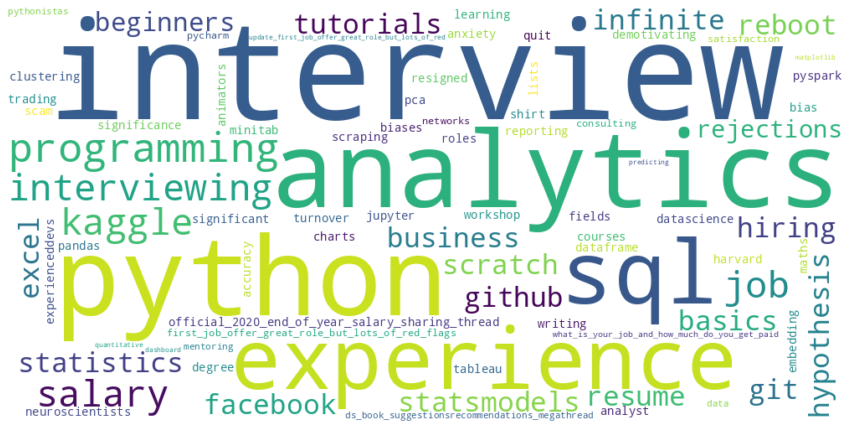

In [10]:
wordCloud(df_score['keyword'])

# Sorting by Comments

In [13]:
df_comms = df.sort_values('comms_num', ascending=False, inplace=False, ignore_index = True).head(100)


In [14]:
#Extract Keyword
df_comms['keyword'] = df_comms['body'].map(lambda x: extractKeywords(x))
df_comms.dropna(inplace = True)

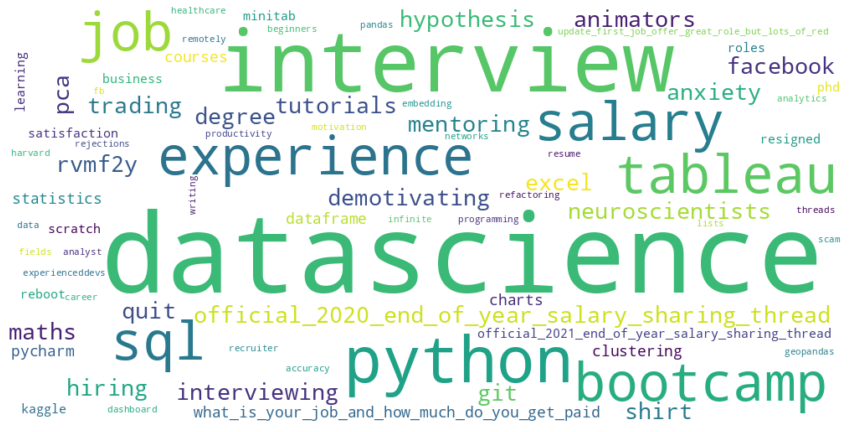

In [15]:
wordCloud(df_comms['keyword'])

# Sorting by Time

In [16]:
#sort by time[top 100]
df_time = df.sort_values('timestamp', ascending=False, inplace=False, ignore_index=True).head(100)

In [18]:
# Extract keyword
df_time['keyword'] = df_time['body'].map(lambda x: extractKeywords(x))
df_time.dropna(inplace=True)

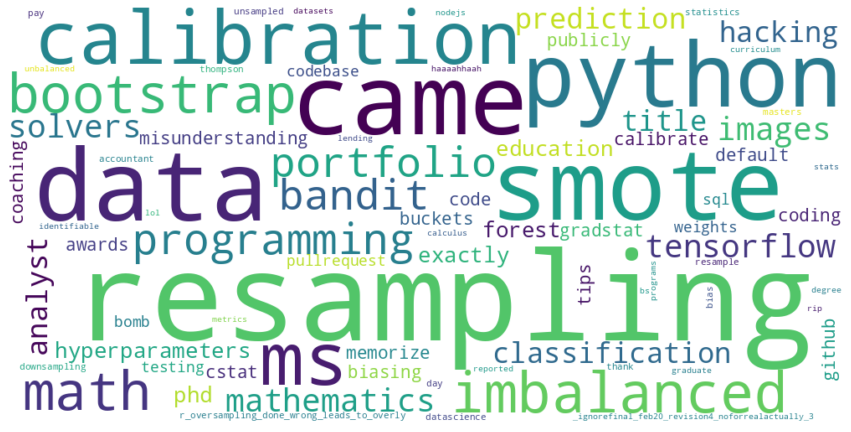

In [19]:
wordCloud(df_time['keyword'])